# <font color=Brown>Retail Giant Sales Forecasting Assignment:

### <font color=purple>Filtering out the warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### <font color=purple>Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <font color=purple>Import time series data: Global Superstore Data
    
**Note:- Please change the reading directory of the dataset as per your requirement.**   
 
 
> - **Global+Superstore+Data.csv** as current file name 

In [3]:
retail_giant = pd.read_csv(r"C:\Users\gohel\OneDrive\Desktop\UpGrad\Courses\Portal Files\Course 3 - Tree Models\Module 4 - Retail Giant Sales Forecasting Assignment\Global+Superstore+Data.csv")
retail_giant.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


### <font color=purple>Understand the Data

In [4]:
# Check the number of rows and columns in the dataframe

retail_giant.shape

(51290, 5)

In [5]:
# Checking the size of the dataframe

retail_giant.size

256450

In [6]:
# Checking data type of the dataframe

retail_giant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [7]:
# Checking the summuary in the dataframe

retail_giant.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


## <font color=Dark>Preparing the Data

In [8]:
# checking the null values in the dataframe

retail_giant.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

#### <font color=Green>Approach:
<font color=Blue> --> **As there are no null values in any columns, missing data does not need to be imputed.**

In [9]:
# Unique Market Segment

retail_giant.nunique().sort_values()

Segment           3
Market            7
Order Date     1430
Sales         22995
Profit        24575
dtype: int64

### <font color=Purple>Converting the Order Date into a date-time format:

In [10]:
# Converting the Order Date Column

retail_giant['Order Date'] = pd.to_datetime(retail_giant['Order Date'], format='%d-%m-%Y').dt.to_period('m')
retail_giant.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


### <font color=purple>Creating new column as Market Segment:

In [11]:
retail_giant['Market_Segment'] = retail_giant['Market'] + '_' + retail_giant['Segment']

In [12]:
retail_giant.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [13]:
# Again checking the Unique Market Segment

retail_giant.nunique().sort_values()

Segment               3
Market                7
Market_Segment       21
Order Date           48
Sales             22995
Profit            24575
dtype: int64

#### <font color=Green>Approach:
<font color=Blue> --> **The global market consists of 3 segments and 7 markets, thus we get 21 unique Market-Segments after combining both segments and markets.**

### <font color=Purple>Visualising the unique columns of Market, Customer and Market-Segments:

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


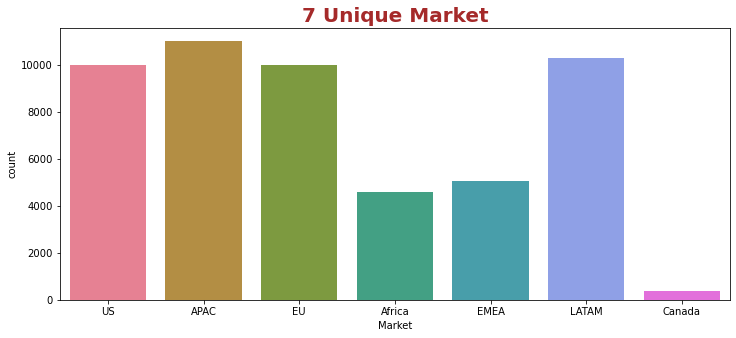

In [14]:
# Creating Countplot for analysing/visualizing the Market columns

plt.figure(figsize=(12,5))
print(retail_giant.Market.value_counts())
sns.countplot(retail_giant['Market'], palette='husl')
plt.title('7 Unique Market', fontweight='bold', size=20,color='Brown')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **The highest number of transactions are from APAC, followed by LATAM, EU and US.**
    
<font color=Blue> --> **Canada has lowest number of transactions.**

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


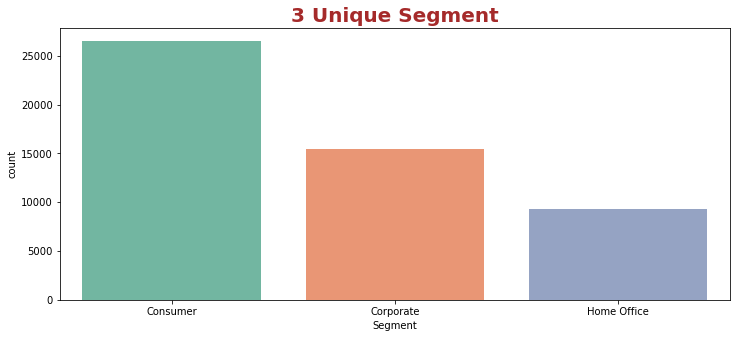

In [15]:
# Creating Countplot for analysing/visualizing the Segment columns

plt.figure(figsize=(12,5))
print(retail_giant.Segment.value_counts())
sns.countplot(retail_giant['Segment'], palette='Set2')
plt.title('3 Unique Segment', fontweight='bold', size=20,color='Brown')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **Consumer products account for the most transactions, followed by Corporate products, and Home Office products account for the fewest.**

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


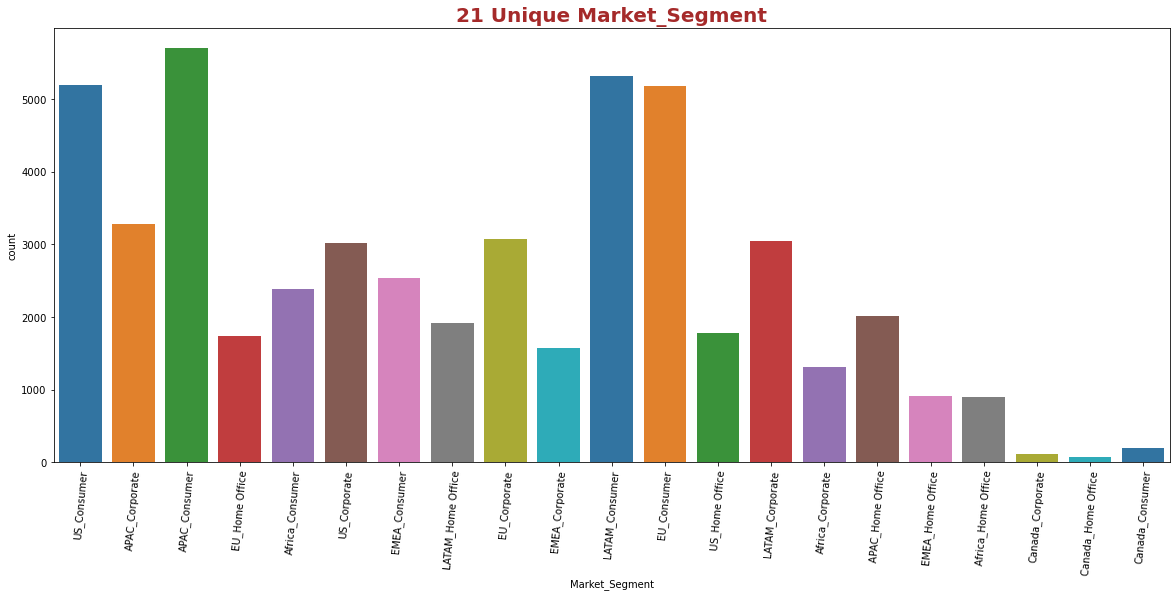

In [16]:
# Creating Countplot for analysing/visualizing the Market_Segment columns

plt.figure(figsize=(20,8))
print(retail_giant.Market_Segment.value_counts())
sns.countplot(retail_giant['Market_Segment'], palette='tab10')
plt.title('21 Unique Market_Segment', fontweight='bold', size=20,color='Brown')
plt.xticks(rotation=85,fontweight="normal")
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **The highest number of transactions are from APAC-Consumer, followed by LATAM-Consumer, US-Consumer and EU-Consumer.**
    
<font color=Blue> --> **Canada seems to be have least number of transactions across Segments.**

#### <font color=Green>Now that we have created a new column for 21 different market segments, we will drop the 'market' and 'segment' columns.

In [17]:
# Dropping the Columns

retail_giant=retail_giant.drop(['Market','Segment'],axis=1)
retail_giant.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US_Consumer
1,2013-02,3709.395,-288.7650,APAC_Corporate
2,2013-10,5175.171,919.9710,APAC_Consumer
3,2013-01,2892.510,-96.5400,EU_Home Office
4,2013-11,2832.960,311.5200,Africa_Consumer


In [18]:
retail_giant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 1.6+ MB


### <font color=Purple>Creating the Pivot Table

In [19]:
# Creating table with index as 'Order Date', value as 'Profit' and Column as 'Market_Segment'

retail_giant_new = retail_giant.pivot_table(index='Order Date',values='Profit',aggfunc='sum',columns='Market_Segment')
retail_giant_new.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [20]:
# Check the number of rows and columns in the retail_giant_new

retail_giant_new.shape

(48, 21)

#### <font color=Green>Approach:
<font color=Blue> --> **we have a data of 48 months for the 21 unique market segment. So, now we'll perform Train and Test Split.**

## <font color=Dark>Train and Test Split:
<font color=Green>**The train split will be done using 42 months of data and the test split will be done using 6 months of data according to the problem statement.**

In [21]:
train_len=42
retail_giant_train=retail_giant_new[0:train_len]
retrail_giant_test=retail_giant_new[train_len:]

In [22]:
retail_giant_train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


### <font color=purple>Finding the most consitently profitable Market-Segment using CoV

<font color=green>**Calculate the CoV on the profit for each of the 21 market segments on the train data.**
    
<font color=blue> --> Before proceeding further with the model, let's calculate Coefficient of Variation (CoV) on Profit for each of these 21 Market-Segments (on Train data). The CoV is a relative measure of dispersion and assesss the degree of dispersion of a data relative to its mean. It is calculated as ratio of Standard Deviation of the distribution with its Mean.
    
<font color=blue> --> **CoV = Standard Deviation / Mean**

<font color=blue> --> We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [23]:
mean = round(np.mean(retail_giant_train),1)
std = round(np.std(retail_giant_train),1)

Cov_df = pd.DataFrame(mean)
Cov_df['Standard Deviation'] = std
Cov_df['Cov'] = round(std/mean*100,1)

Cov_df = Cov_df.reset_index()
Cov_df.columns = ['Market-Segment','Mean','Std','Cov(%)']
Cov_df.sort_values(by ='Cov(%)',ascending = True,inplace = True)

In [24]:
Cov_df

,Market-Segment,Mean,Std,Cov(%)
0,APAC_Consumer,4223.6,2518.9,59.6
12,EU_Consumer,3627.5,2348.8,64.7
15,LATAM_Consumer,2252.7,1533.4,68.1
13,EU_Corporate,2252.0,1552.4,68.9
1,APAC_Corporate,2557.0,1871.5,73.2
16,LATAM_Corporate,1076.0,947.2,88.0
19,US_Corporate,1853.6,1904.0,102.7
2,APAC_Home Office,1379.1,1446.4,104.9
18,US_Consumer,2603.7,2851.9,109.5
14,EU_Home Office,1097.4,1223.3,111.5


In [25]:
# Lowest CoV Value 

Lowest_Cov_value =min(Cov_df["Cov(%)"])
Lowest_Cov_value

59.6

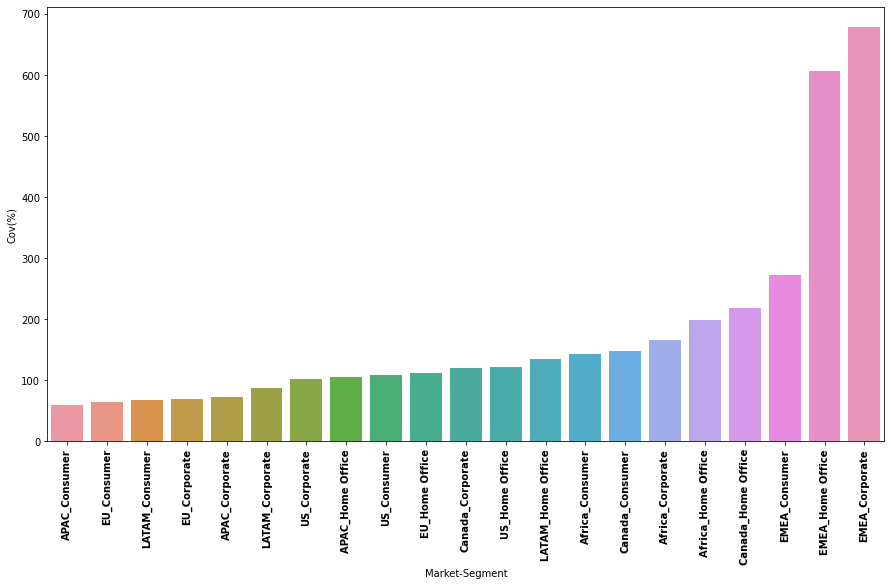

In [26]:
# Plotting CoV Curve

plt.figure(figsize=(15,8))
sns.barplot(data=Cov_df, x='Market-Segment', y='Cov(%)')
plt.xticks(rotation=90,fontweight="bold",)
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **According to data and graph, 'APAC_Consumer' has the least CoV of 59.6, which indicates that it is the most stable market segment.**
    
<font color=Blue> --> **As a result, it makes sense to analyse the 'APAC_Consumer' market segment.**

### <font color=purple>Filter the Data for Best Market Segment

In [27]:
# Making 'APAC_Consumer' as a separate Dataframe

APAC_Consumer=retail_giant[retail_giant['Market_Segment']=='APAC_Consumer']
APAC_Consumer.set_index('Order Date')
APAC_Consumer.head()

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.171,919.971,APAC_Consumer
6,2011-11,1822.080,564.840,APAC_Consumer
7,2012-04,5244.840,996.480,APAC_Consumer
14,2013-06,3701.520,1036.080,APAC_Consumer
29,2012-02,1878.720,582.360,APAC_Consumer


In [28]:
# Dropping the Market_Segment Column

APAC_Consumer = APAC_Consumer.drop(columns = ['Market_Segment'])
APAC_Consumer.head()

,Order Date,Sales,Profit
2,2013-10,5175.171,919.971
6,2011-11,1822.080,564.840
7,2012-04,5244.840,996.480
14,2013-06,3701.520,1036.080
29,2012-02,1878.720,582.360


In [29]:
# Check the number of rows and columns in the APAC_Consumer

APAC_Consumer.shape

(5699, 3)

### <font color=Purple>Converting the Order Date into a date-time format:

In [30]:
# Converting the Order Date Column

APAC_Consumer['Order Date']=APAC_Consumer['Order Date'].apply(lambda x:x.to_timestamp())
APAC_Consumer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699 entries, 2 to 51252
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  5699 non-null   datetime64[ns]
 1   Sales       5699 non-null   float64       
 2   Profit      5699 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 178.1 KB


### <font color=purple>Aggregate Sales and Profit by month

In [31]:
APAC_Consumer=APAC_Consumer.groupby(APAC_Consumer['Order Date']).sum()
APAC_Consumer.head()

,Sales,Profit
Order Date,,
2011-01-01,15711.7125,991.2825
2011-02-01,12910.8588,1338.8688
2011-03-01,19472.5632,3747.1632
2011-04-01,15440.3046,3846.4746
2011-05-01,24348.9723,3639.9423


In [32]:
# Again Checking the number of rows and columns in the APAC_Consumer

APAC_Consumer.shape

(48, 2)

#### <font color=Green>Approach:
<font color=Blue> --> **Combining the Sales and Profit data based on each month, we get the overall data for 48 months (4 years).**


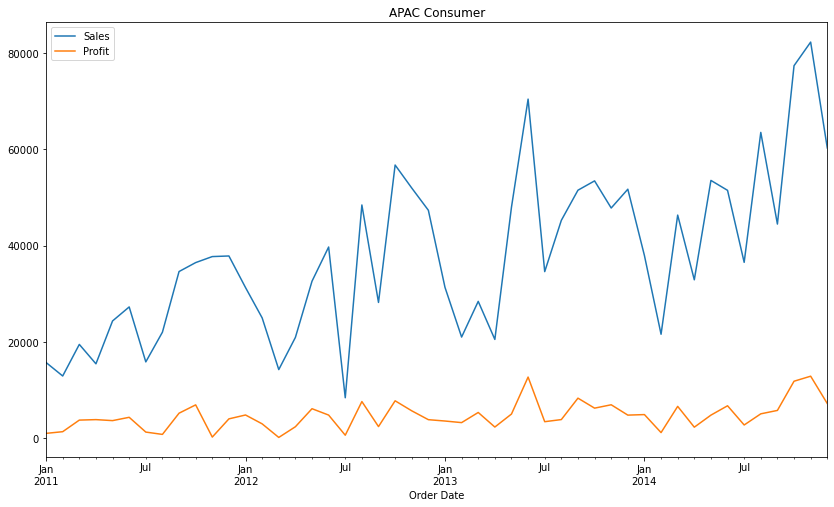

In [33]:
# Plotting the Overall 'APAC_Consumer'

APAC_Consumer.plot(figsize=(14,8))
plt.legend(loc='best')
plt.title('APAC Consumer')
plt.show()

## <font color=Dark>Time series analysis

In [34]:
# Checking Null values

APAC_Consumer.isnull().sum()

Sales     0
Profit    0
dtype: int64

#### <font color=Green>Approach:
<font color=Blue> --> **There are no misssing values.**

### <font color=purple>Train and Test Split:
<font color=Green>**The train split will be done using 42 months of data and the test split will be done using 6 months of data according to the problem statement.**

In [35]:
train_len = 42

APAC_Consumer_train = APAC_Consumer[0:train_len]
APAC_Consumer_test = APAC_Consumer[train_len:]

APAC_Consumer_train = APAC_Consumer_train.reset_index()
APAC_Consumer_train.head()

,Order Date,Sales,Profit
0,2011-01-01,15711.7125,991.2825
1,2011-02-01,12910.8588,1338.8688
2,2011-03-01,19472.5632,3747.1632
3,2011-04-01,15440.3046,3846.4746
4,2011-05-01,24348.9723,3639.9423


In [36]:
# Reset & Set index for the Order Date Column in train dataset

APAC_Consumer_train = APAC_Consumer_train.set_index(['Order Date'])
APAC_Consumer_train.head()

,Sales,Profit
Order Date,,
2011-01-01,15711.7125,991.2825
2011-02-01,12910.8588,1338.8688
2011-03-01,19472.5632,3747.1632
2011-04-01,15440.3046,3846.4746
2011-05-01,24348.9723,3639.9423


In [37]:
APAC_Consumer_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2011-01-01 to 2014-06-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
 1   Profit  42 non-null     float64
dtypes: float64(2)
memory usage: 1008.0 bytes


## <font color=Dark>Time-Series Decomposition:
<font color=Green> **Lets understand how a time series can be split into its various components that is the Trend, Seasonality, and Residuals.**

### <font color=Purple> Additive Seasonal Decomposition
<font color=Green> **The individual components can be added to get the time-series data.**

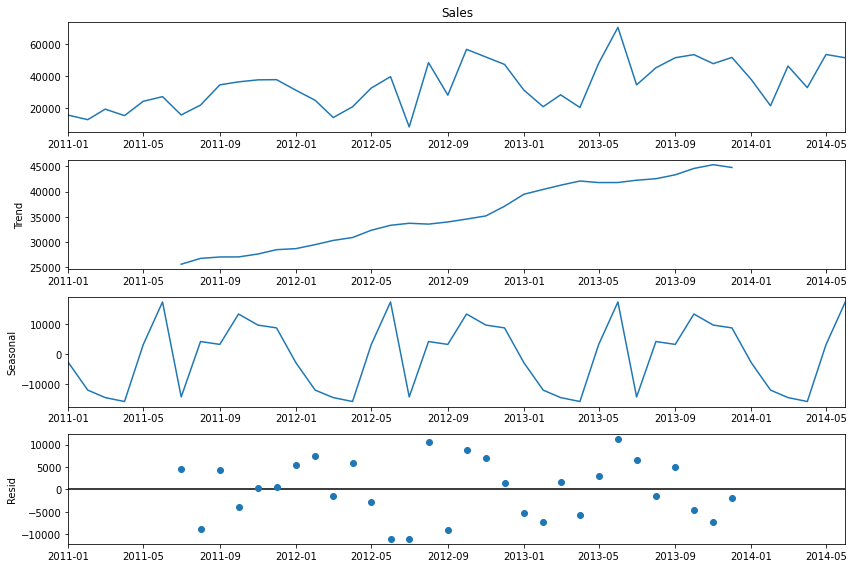

In [38]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = (12,8)
de_comp = sm.tsa.seasonal_decompose(APAC_Consumer_train.Sales,model = 'additive')
fig = de_comp.plot()
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **Observing the above graph, we see an upward trend and some seasonality as well.**
    
<font color=Blue> --> **The residuals seem to have some pattern.**

### <font color=Purple> Multiplicative Seasonal Decomposition
<font color=Green> **The individual components can be multiplied to get the time-series data.**

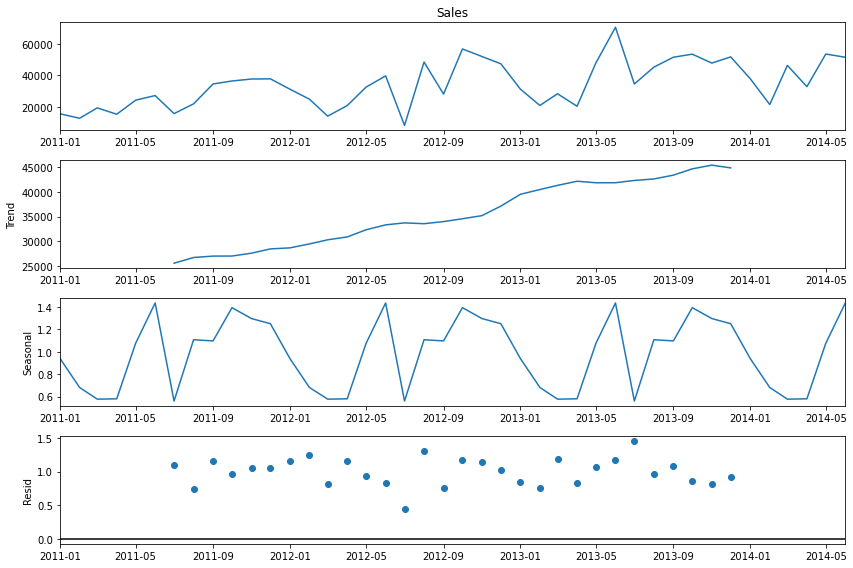

In [39]:
rcParams['figure.figsize'] = (12,8)
de_comp = sm.tsa.seasonal_decompose(APAC_Consumer_train.Sales,model = 'multiplicative')
fig = de_comp.plot()
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **we can see that the trend is again having the upward movement.**
    
<font color=Blue> --> **A certain pattern can be sensed in seasonality, and residuals seem to have been disrupted a little bit.**

In [40]:
# Reset & Set index for the Order Date Column in test dataset

APAC_Consumer_test = APAC_Consumer_test.reset_index()
APAC_Consumer_test = APAC_Consumer_test.set_index(['Order Date'])
APAC_Consumer_test.head()

,Sales,Profit
Order Date,,
2014-07-01,36524.3028,2732.4828
2014-08-01,63521.7729,5050.6929
2014-09-01,44477.2662,5758.2162
2014-10-01,77379.8286,11824.2486
2014-11-01,82286.3583,12869.9883


## <font color=Dark>Building and Evaluating Time Series Forecasts

## <font color=navy> >> Simple time series methods

### <font color=Purple> ~> Naive Method:
<font color=Green> **Forecast = Last month’s sales**

In [41]:
APAC_consumer_naive = APAC_Consumer_test.copy()
APAC_consumer_naive['naive_forecast'] = APAC_Consumer_train['Sales'][train_len-1] #Last observation in the train data

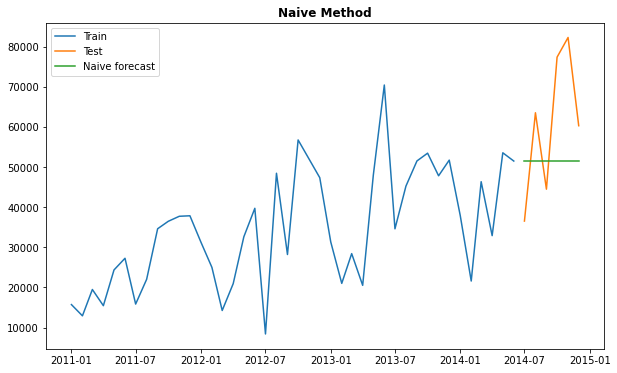

In [42]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_consumer_naive['naive_forecast'], label = 'Naive forecast')
plt.legend(loc = 'best')
plt.title('Naive Method', fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **We can see that the forecast for the next six months is having the same value (green line) as the last observation of the blue line.**

In [43]:
# Calculating RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_consumer_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_naive['naive_forecast'])/APAC_Consumer_test['Sales'])*100,2)

output = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


### <font color=Purple> ~> Simple Average Method:
<font color=Green> **Forecast = Average of all past months sales**

In [44]:
APAC_consumer_avg = APAC_Consumer_test.copy()
APAC_consumer_avg['avg_forecast'] = APAC_Consumer_train['Sales'].mean()# Average of past months sales

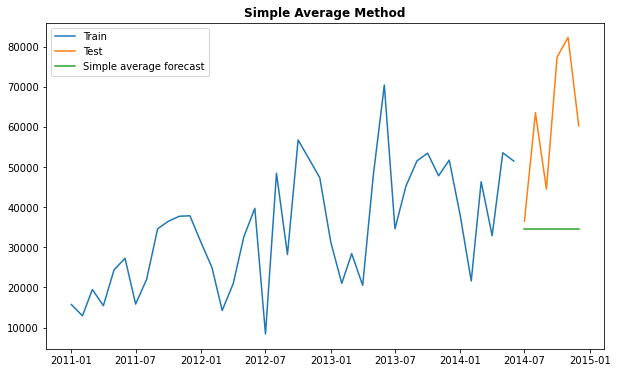

In [45]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_consumer_avg['avg_forecast'], label = 'Simple average forecast')
plt.legend(loc = 'best')
plt.title('Simple Average Method', fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **The forecasted data is not showing any trend or seasonality while our train and test data had both trend and seasonality.**

In [46]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_consumer_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_avg['avg_forecast'])/APAC_Consumer_test['Sales'])*100,2)

tempoutput = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
output = pd.concat([output, tempoutput])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


### <font color=Purple> ~> Simple Moving Average Method:
<font color=Green> **Forecast = Average of only the last few observations to forecast the future.**
    
<font color=Green> **It Reduces the unsystematic noise in the data.**

In [47]:
APAC_consumer_sma = APAC_Consumer.copy()
ma_window = 3  # Considered 3 month window
APAC_consumer_sma['sma_forecast'] = APAC_Consumer['Sales'].rolling(ma_window).mean()
APAC_consumer_sma['sma_forecast'][train_len:] = APAC_consumer_sma['sma_forecast'][train_len-1]

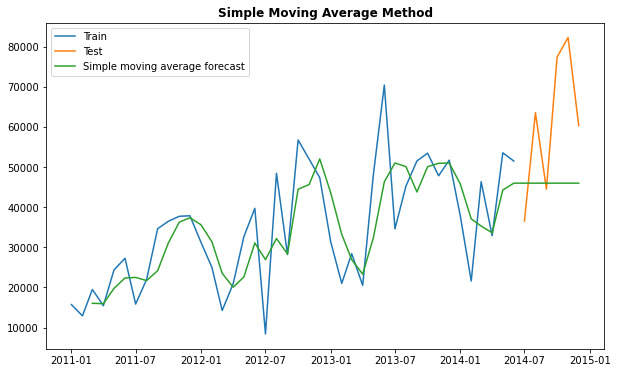

In [48]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_consumer_sma['sma_forecast'], label = 'Simple moving average forecast')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method', fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **The forecasted data is showing only the flat estimate while our train and test data shows both trend and seasonality.**

In [49]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_consumer_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_sma['sma_forecast'][train_len:])/APAC_Consumer_test['Sales'])*100,2)

tempoutput = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
output = pd.concat([output, tempoutput])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55


## <font color=navy> >> Smoothing Techniques

### <font color=Purple> ~> Simple Exponential Smoothing:
    
<font color=Green> **The smoothing factor is multiplied by the demand of the most recent period.**

<font color=Green> **It is a time series forecasting method for univariate data without a trend or seasonality.**

<font color=Green> **The simple exponetial model captures the level of a time series.**

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

APAC_consumer_ses = APAC_Consumer_test.copy()
smooth_model = SimpleExpSmoothing(APAC_Consumer_train['Sales'])
model_fit = smooth_model.fit(optimized = True)
model_fit.params
APAC_consumer_ses['Sales_Forecast'] = model_fit.forecast(6)

C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


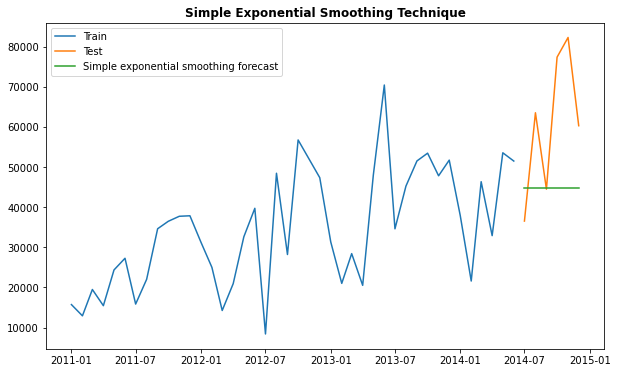

In [51]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'],label = 'Train')
plt.plot(APAC_Consumer_test['Sales'],label = 'Test')
plt.plot(APAC_consumer_ses['Sales_Forecast'], label = 'Simple exponential smoothing forecast')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing Technique',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **Simple Exponential Smoothing gives us a flat estimate of the coming six months and doesn't account for monthly movements.**

In [52]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_consumer_ses['Sales_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_ses['Sales_Forecast'])/APAC_Consumer_test['Sales'])*100,2)

tempoutput = pd.DataFrame({'Method':['Simple Exponential Method'], 'RMSE': [rmse],'MAPE': [mape] })
output = pd.concat([output, tempoutput])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70


### <font color=Purple> ~> Holt's Exponential Smoothing:
    
<font color=Green> **Captures both level and trend of a time series in the forecast.**

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

APAC_consumer_hes = APAC_Consumer_test.copy()
smooth_model = ExponentialSmoothing(np.asarray(APAC_Consumer_train['Sales']),seasonal_periods = 12,trend = 'additive',seasonal = None)
model_fit = smooth_model.fit(optimized = True)
print(model_fit.params)

{'smoothing_level': 0.45285714285714285, 'smoothing_trend': 0.0646938775510204, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.7125, 'initial_trend': -2800.8536999999997, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [54]:
APAC_consumer_hes['Sales_Forecast']=model_fit.forecast(6)

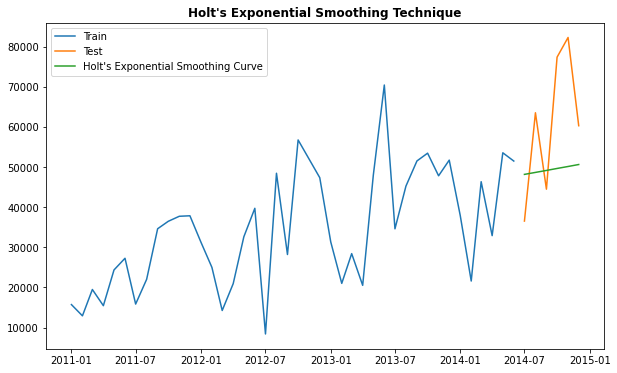

In [55]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'],label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_consumer_hes['Sales_Forecast'],label = 'Holt\'s Exponential Smoothing Curve')
plt.title('Holt\'s Exponential Smoothing Technique',fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **The forecast is a straight line, sloping upward as Holt's method captures both level and trend.**

In [56]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_consumer_hes['Sales_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_hes['Sales_Forecast'])/APAC_Consumer_test['Sales'])*100,2)
tempoutput = pd.DataFrame({'Method':['Holt\'s Exponential Trend Technique'],'RMSE':[rmse],'MAPE':[mape]})
output = pd.concat([output,tempoutput])
output = output[['Method','RMSE','MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12


### <font color=Purple> ~> Holt Winters' additive method with trend and seasonality:
    
<font color=Green> **Forecasts based on level, trend and seasonality of a time series through additive method.**

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

APAC_consumer_hwa = APAC_Consumer_test.copy()
smooth_model = ExponentialSmoothing(np.asarray(APAC_Consumer_train['Sales']),seasonal_periods = 12,trend = 'add',seasonal = 'add')
model_fit = smooth_model.fit(optimized = True)
print(model_fit.params)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [58]:
APAC_consumer_hwa['Sales_Forecast']=model_fit.forecast(6)

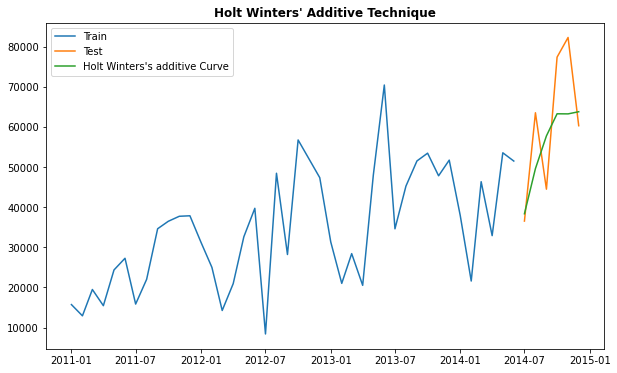

In [59]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_consumer_hwa['Sales_Forecast'],label = 'Holt Winters\'s additive Curve')
plt.title('Holt Winters\' Additive Technique',fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **This forecast is able to capture trend which gives us an upward trending estimate and takes care of seasonal variation.**

In [60]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'],APAC_consumer_hwa['Sales_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_hwa['Sales_Forecast'])/APAC_Consumer_test['Sales'])*100,2)
tempoutput = pd.DataFrame({'Method':['Holt Winters\'s Additive Method'],'RMSE':[rmse],'MAPE':[mape]})
output = pd.concat([output,tempoutput])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32


### <font color=Purple> ~> Holt Winters' multiplicative method with trend and seasonality:
    
<font color=Green> **Forecasts based on level, trend and seasonality of a time series through multiplicative method.**

In [61]:
APAC_consumer_hwm = APAC_Consumer_test.copy()
smooth_model = ExponentialSmoothing(np.asarray(APAC_Consumer_train['Sales']) ,seasonal_periods = 12 ,trend = 'add', seasonal = 'mul')
model_fit = smooth_model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [62]:
APAC_consumer_hwm['Sales_Forecast']=model_fit.forecast(6)

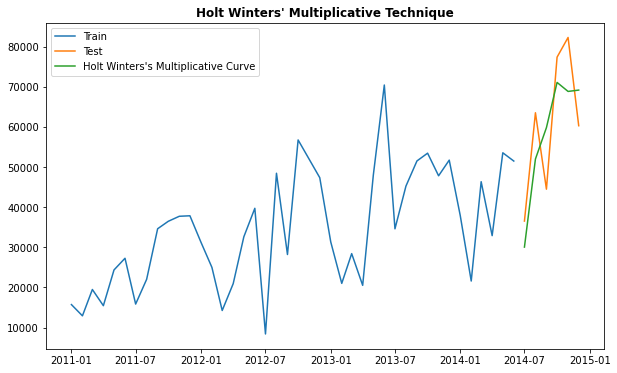

In [63]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_consumer_hwm['Sales_Forecast'],label = 'Holt Winters\'s Multiplicative Curve')
plt.legend(loc = 'best')
plt.title('Holt Winters\' Multiplicative Technique',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **This forecast is also able to capture trend which gives us an upward trending estimate and takes care of seasonal variation.**

In [64]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_consumer_hwm['Sales_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_consumer_hwm['Sales_Forecast'])/APAC_Consumer_test['Sales'])*100,2)
tempoutput = pd.DataFrame({'Method':['Holt Winters\'s Multiplicative Method'],'RMSE':[rmse],'MAPE':[mape]})
output = pd.concat([output,tempoutput])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27


## <font color=navy> >> Auto Regressive methods

<font color=Green> **The regression technique is used in autoregressive models to formulate time series problems. Using a linear combination of past observations of the same variable, we implement autoregressive models.**
    

### <font color=navy> ~~>> Stationarity Vs. Non-Stationarity in the Time Series:
    
<font color=Green> **Time-series stationarity will be checked before proceeding with ARIMA methods.**
    
<font color=Green> **If the Time-Series is not Stationary, we need to transform it in order to make it Stationary.**
  
<font color=Green> **Two statistical tests, namely ADF and KPSS, will be performed in order to validate the Stationarity of the Time Series.**

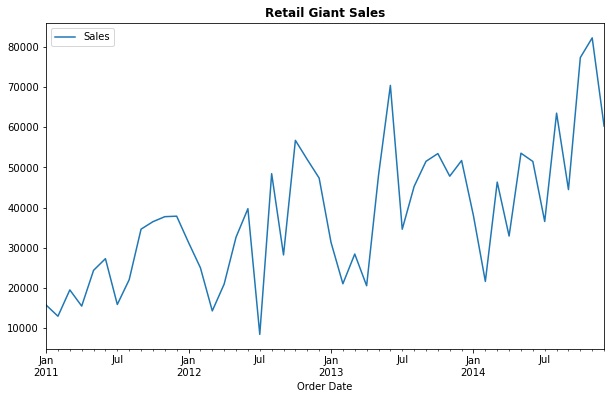

In [65]:
APAC_Consumer['Sales'].plot(figsize = (10,6))
plt.legend(loc = 'best')
plt.title('Retail Giant Sales', fontweight = 'bold')
plt.show(block=False)

### <font color=Purple> ~> Augmented Dickey-Fuller (ADF) Test:
    
<font color=Green> **Null Hypothesis (𝐻0):** The series is not stationary 𝑝−𝑣𝑎𝑙𝑢𝑒 > 0.05
    
<font color=Green> **Alternate Hypothesis (𝐻1):** The series is stationary 𝑝−𝑣𝑎𝑙𝑢𝑒 <= 0.05

In [66]:
from statsmodels.tsa.stattools import adfuller

ADF_test = adfuller(APAC_Consumer['Sales'])
print('ADF Statistics: %f' % ADF_test[0])
print('Critical Value @ 0.05: %.2f' % ADF_test[4]['5%'])
print('p-value: %f' % ADF_test[1])

ADF Statistics: -2.220857
Critical Value @ 0.05: -2.93
p-value: 0.198763


#### <font color=Green>Approach:
    
<font color=Blue> --> **We can see that p-value is 0.19, which is greater than 0.05.**
    
<font color=Blue> --> **From above result we will go with the Null Hypothesis that the series is not stationary.**

### <font color=Purple> ~> Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
    
<font color=Green> **Null Hypothesis (𝐻0):** The series is stationary 𝑝−𝑣𝑎𝑙𝑢𝑒 > 0.05
    
<font color=Green> **Alternate Hypothesis (𝐻1):** The series is not stationary 𝑝−𝑣𝑎𝑙𝑢𝑒 <= 0.05

In [67]:
from statsmodels.tsa.stattools import kpss

KPSS_test = kpss(APAC_Consumer['Sales'])
print('KPSS Statistics: %f: ' % KPSS_test[0])
print('Critical Value @ 0.05: %.2f' % KPSS_test[3]['5%'])
print('p-value: %f' % KPSS_test[1])

KPSS Statistics: 0.595515: 
Critical Value @ 0.05: 0.46
p-value: 0.023044


#### <font color=Green>Approach:
    
<font color=Blue> --> **We can see that p-value is 0.023, which is less than 0.05.**
    
<font color=Blue> --> **Thus our Null Hypothesis that the data is stationary gets rejected over here.**

### <font color=Green> -->>To make the dataset stationary and suitable for Auto Regression Models, we need to take necessary steps such as differencing and boxcox transformation.

### <font color=Purple> ~> Box Cox Transformation:

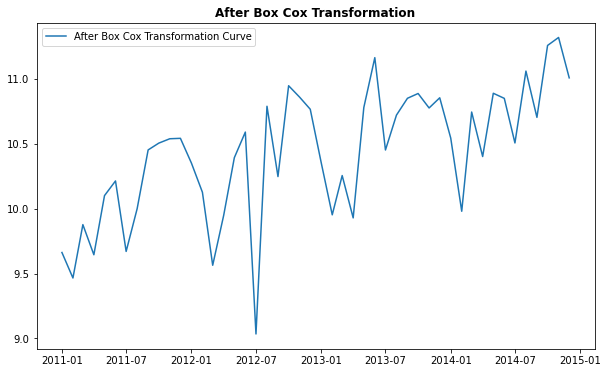

In [68]:
from scipy.stats import boxcox

plt.figure(figsize = (10,6))
boxcox_data = pd.Series(boxcox(APAC_Consumer['Sales'],lmbda = 0),index = APAC_Consumer.index)
plt.plot(boxcox_data, label = 'After Box Cox Transformation Curve')
plt.title('After Box Cox Transformation',fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

### <font color=Purple> ~> Differencing:

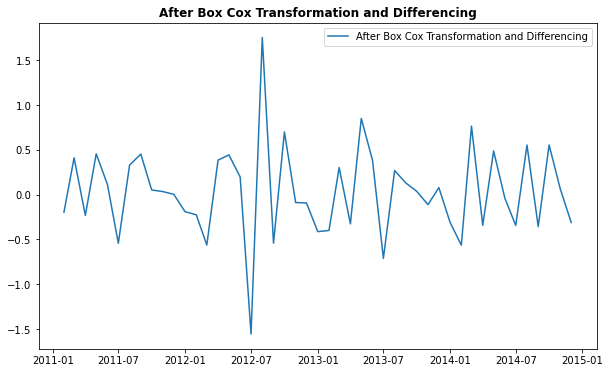

In [69]:
boxcox_diff = pd.Series(boxcox_data - boxcox_data.shift())
boxcox_diff.dropna(inplace = True)
plt.figure(figsize=(10,6))
plt.plot(boxcox_diff,label = 'After Box Cox Transformation and Differencing')
plt.legend(loc = 'best')
plt.title('After Box Cox Transformation and Differencing',fontweight = 'bold')
plt.show()

### <font color=Purple> ~> Augmented Dickey-Fuller (ADF) Test post Box Cox Transformation and Differencing

In [70]:
from statsmodels.tsa.stattools import adfuller

ADF_test = adfuller(boxcox_diff)
print('ADF Statistics: %f' % ADF_test[0])
print('Critical Value @ 0.05: %.2f' % ADF_test[4]['5%'])
print('p-value: %f' % ADF_test[1])
print(ADF_test)

ADF Statistics: -5.769275
Critical Value @ 0.05: -2.95
p-value: 0.000001
(-5.769274716501974, 5.440064109311178e-07, 10, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 44.94452478089515)


#### <font color=Green>Approach:
    
<font color=Blue> --> **We can see that p-value is ~0.00, which is less than 0.05.**
    
<font color=Blue> --> **Thus we reject the null hypothesis i.e., the series is now stationary.**

### <font color=Purple> ~> Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test post Box Cox Transformation and Differencing

In [71]:
from statsmodels.tsa.stattools import kpss

KPSS_test = kpss(boxcox_diff)
print('KPSS Statistics: %f: ' % KPSS_test[0])
print('Critical Value @ 0.05: %.2f' % KPSS_test[3]['5%'])
print('p-value: %f' % KPSS_test[1])
print(KPSS_test)

KPSS Statistics: 0.135659: 
Critical Value @ 0.05: 0.46
p-value: 0.100000
(0.135659215315683, 0.1, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### <font color=Green>Approach:
    
<font color=Blue> --> **We can see that p-value is 0.10, which is greater than 0.05.**
    
<font color=Blue> --> **Thus we fail to reject the null hypothesis i.e., the series is now stationary.**

### <font color=green> -->> Let's have a quick look at the ACF and PACF plots to visualize Autocorrelations

### <font color=Purple> ~> Autocorrelation Function (ACF) Plot

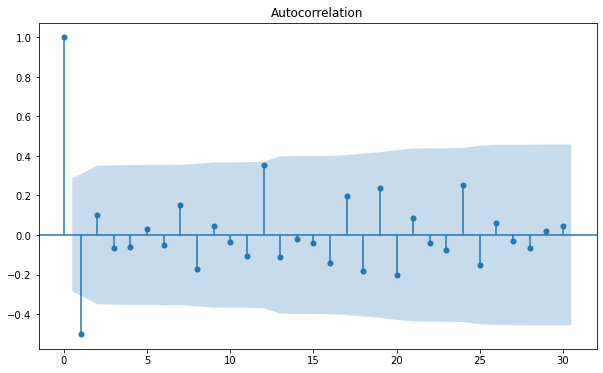

In [72]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (10,6))
plot_acf(boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

### <font color=Purple> ~> Partial Autocorrelation (PACF) Plot

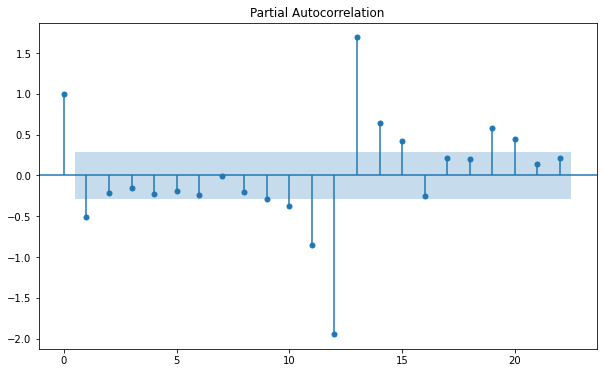

In [73]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,6))
plot_pacf(boxcox_diff,ax = plt.gca(),lags = 22)
plt.show()

## <font color=navy> >> Auto Regressive Methods

In [74]:
# splitting the boxcox series into train and test series

train_boxcox_data = boxcox_data[:train_len]
test_boxcox_data = boxcox_data[train_len:]
train_boxcox_diff = boxcox_diff[:train_len-1]
test_boxcox_diff = boxcox_diff[train_len-1:]

### <font color=Purple> ~> Auto Regression (AR) Method:

In [75]:
from statsmodels.tsa.arima_model import ARIMA
smooth_model = ARIMA(train_boxcox_diff, order = (1,0,0))
model_fit = smooth_model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
# Recover Original Time Series Forecast

APAC_Consumer_AR = boxcox_diff.copy()
APAC_Consumer_AR['AR_Sales_Forecast_Boxcox_Diff'] = model_fit.predict(boxcox_diff.index.min(), boxcox_diff.index.max())
APAC_Consumer_AR['AR_Sales_Forecast_Boxcox'] = APAC_Consumer_AR['AR_Sales_Forecast_Boxcox_Diff'].cumsum()
APAC_Consumer_AR['AR_Sales_Forecast_Boxcox'] = APAC_Consumer_AR['AR_Sales_Forecast_Boxcox'].add(boxcox_data[0])
APAC_Consumer_AR['AR_Sales_Forecast'] = np.exp(APAC_Consumer_AR['AR_Sales_Forecast_Boxcox'])

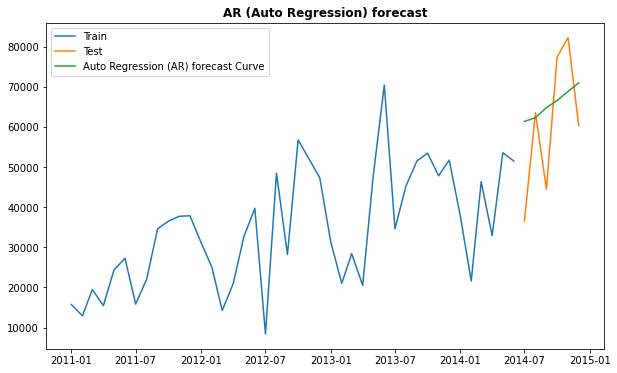

In [77]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_Consumer_AR['AR_Sales_Forecast'][APAC_Consumer_test.index.min():], label = 'Auto Regression (AR) forecast Curve')
plt.legend(loc = 'best')
plt.title('AR (Auto Regression) forecast',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
    
<font color=Blue> --> **Observing the plot, we can see that the forecast captured the trend but not the seasonality.**

In [78]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_Consumer_AR['AR_Sales_Forecast'][APAC_Consumer_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_Consumer_AR['AR_Sales_Forecast'][APAC_Consumer_test.index.min():])/APAC_Consumer_test['Sales'])*100,2)
temp_output = pd.DataFrame({'Method':['AR (Auto Regression) Method'], 'RMSE': [rmse],'MAPE': [mape]})
output = pd.concat([output, temp_output])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27
0,AR (Auto Regression) Method,15505.03,27.27


### <font color=Purple> ~> Moving Average (MA) Method:

In [79]:
smooth_model = ARIMA(train_boxcox_diff, order = (0, 0, 1))
model_fit = smooth_model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [80]:
# Recover Original Time Series Forecast

APAC_Consumer_MA = boxcox_diff.copy()
APAC_Consumer_MA['MA_Sales_Forecast_Boxcox_Diff'] = model_fit.predict(boxcox_diff.index.min(), boxcox_diff.index.max())
APAC_Consumer_MA['MA_Sales_Forecast_Boxcox'] = APAC_Consumer_MA['MA_Sales_Forecast_Boxcox_Diff'].cumsum()
APAC_Consumer_MA['MA_Sales_Forecast_Boxcox'] = APAC_Consumer_MA['MA_Sales_Forecast_Boxcox'].add(boxcox_data[0])
APAC_Consumer_MA['MA_Sales_Forecast'] = np.exp(APAC_Consumer_MA['MA_Sales_Forecast_Boxcox'])

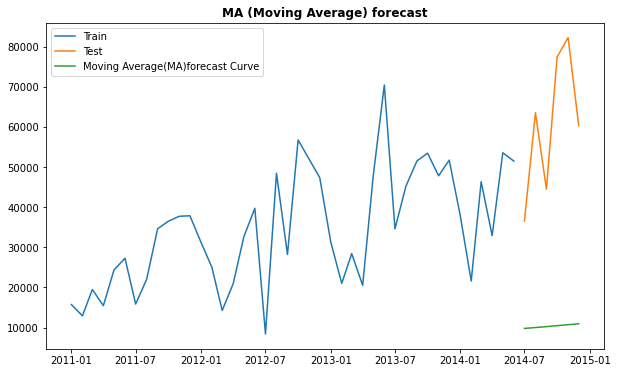

In [81]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_Consumer_MA['MA_Sales_Forecast'][APAC_Consumer_test.index.min():], label = 'Moving Average(MA)forecast Curve')
plt.legend(loc = 'best')
plt.title('MA (Moving Average) forecast',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
    
<font color=Blue> --> **We are able to capture trend but not seasonality in the forecast.**

In [82]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_Consumer_MA['MA_Sales_Forecast'][APAC_Consumer_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_Consumer_MA['MA_Sales_Forecast'][APAC_Consumer_test.index.min():])/APAC_Consumer_test['Sales'])*100,2)
temp_output = pd.DataFrame({'Method':['MA (Moving Average) Method'], 'RMSE': [rmse],'MAPE': [mape]})
output = pd.concat([output, temp_output])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27
0,AR (Auto Regression) Method,15505.03,27.27
0,MA (Moving Average) Method,52903.35,81.64


### <font color=Purple> ~> Auto Regressive Moving Average (ARMA) Model:

In [83]:
smooth_model = ARIMA(train_boxcox_diff, order = (1, 0, 1))
model_fit = smooth_model.fit()
print(model_fit.params)

C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.022810
ar.L1.y    0.115923
ma.L1.y   -0.999970
dtype: float64


In [84]:
# Recover Original Time Series Forecast

APAC_Consumer_ARMA = boxcox_diff.copy()
APAC_Consumer_ARMA['ARMA_Sales_Forecast_Boxcox_Diff'] = model_fit.predict(boxcox_diff.index.min(),boxcox_diff.index.max())
APAC_Consumer_ARMA['ARMA_Sales_Forecast_Boxcox'] = APAC_Consumer_ARMA['ARMA_Sales_Forecast_Boxcox_Diff'].cumsum()
APAC_Consumer_ARMA['ARMA_Sales_Forecast_Boxcox'] = APAC_Consumer_ARMA['ARMA_Sales_Forecast_Boxcox'].add(boxcox_data[0])
APAC_Consumer_ARMA['ARMA_Sales_Forecast'] = np.exp(APAC_Consumer_ARMA['ARMA_Sales_Forecast_Boxcox'])

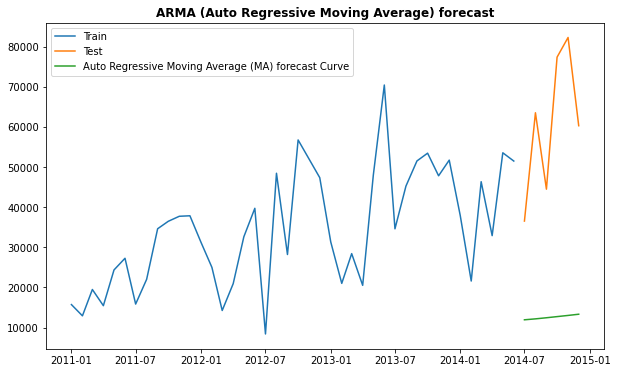

In [85]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_Consumer_ARMA['ARMA_Sales_Forecast'][APAC_Consumer_test.index.min():], label = 'Auto Regressive Moving Average (MA) forecast Curve')
plt.legend(loc = 'best')
plt.title('ARMA (Auto Regressive Moving Average) forecast',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
    
<font color=Blue> --> **We were able to capture trend but not seasonality using ARMA model.**

In [86]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_Consumer_ARMA['ARMA_Sales_Forecast'][APAC_Consumer_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_Consumer_ARMA['ARMA_Sales_Forecast'][APAC_Consumer_test.index.min():])/APAC_Consumer_test['Sales'])*100,2)
temp_output = pd.DataFrame({'Method':['ARMA (Auto Regressive Moving Average) Method'], 'RMSE': [rmse],'MAPE': [mape]})
output = pd.concat([output, temp_output])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27
0,AR (Auto Regression) Method,15505.03,27.27
0,MA (Moving Average) Method,52903.35,81.64
0,ARMA (Auto Regressive Moving Average) Method,50757.91,77.66


### <font color=Purple> ~> Auto Regressive Integrated Moving Average (ARIMA) Model:

In [87]:
# passing a data_boxcox data instead of data_boxcox_diff because ARIMA takes care of differencing

smooth_model = ARIMA(train_boxcox_data, order = (1, 1, 1))
model_fit = smooth_model.fit()
print(model_fit.params)

C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const        0.022810
ar.L1.D.y    0.115923
ma.L1.D.y   -0.999970
dtype: float64


In [88]:
# Recover Original Time Series Forecast

APAC_Consumer_ARIMA = boxcox_diff.copy()
APAC_Consumer_ARIMA['ARIMA_Sales_Forecast_Boxcox_Diff'] = model_fit.predict(boxcox_diff.index.min(), boxcox_diff.index.max())
APAC_Consumer_ARIMA['ARIMA_Sales_Forecast_Boxcox'] = APAC_Consumer_ARIMA['ARIMA_Sales_Forecast_Boxcox_Diff'].cumsum()
APAC_Consumer_ARIMA['ARIMA_Sales_Forecast_Boxcox'] = APAC_Consumer_ARIMA['ARIMA_Sales_Forecast_Boxcox'].add(boxcox_data[0])
APAC_Consumer_ARIMA['ARIMA_Sales_Forecast'] = np.exp(APAC_Consumer_ARIMA['ARIMA_Sales_Forecast_Boxcox'])

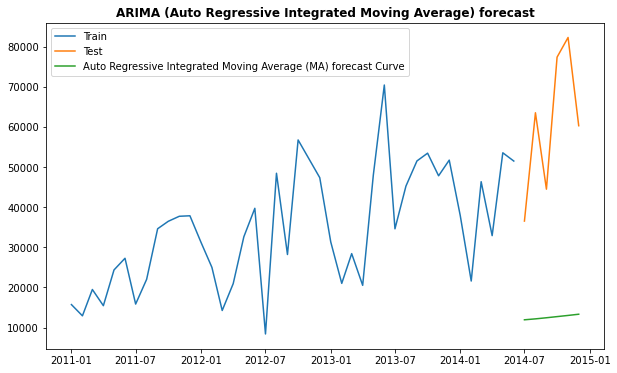

In [89]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_Consumer_ARIMA['ARIMA_Sales_Forecast'][APAC_Consumer_test.index.min():], label = 'Auto Regressive Integrated Moving Average (MA) forecast Curve')
plt.legend(loc = 'best')
plt.title('ARIMA (Auto Regressive Integrated Moving Average) forecast',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
    
<font color=Blue> --> **Using ARIMA model, we were able to capture Trend, but not Seasonality.**

In [90]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_Consumer_ARIMA['ARIMA_Sales_Forecast'][APAC_Consumer_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_Consumer_ARIMA['ARIMA_Sales_Forecast'][APAC_Consumer_test.index.min():])/APAC_Consumer_test['Sales'])*100,2)
temp_output = pd.DataFrame({'Method':['ARIMA (Auto Regressive Integrated Moving Average) Method'], 'RMSE': [rmse],'MAPE': [mape]})
output = pd.concat([output, temp_output])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27
0,AR (Auto Regression) Method,15505.03,27.27
0,MA (Moving Average) Method,52903.35,81.64
0,ARMA (Auto Regressive Moving Average) Method,50757.91,77.66


### <font color=Purple> ~> Seasonal Auto Regressive Integrated Moving Average (SARIMA) Model:

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
smooth_model = SARIMAX(train_boxcox_data,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = smooth_model.fit()
print(model_fit.params)

C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\gohel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.099689
ma.L1      -0.994635
ar.S.L12   -0.396340
ma.S.L12   -0.986822
sigma2      0.047238
dtype: float64


In [92]:
# Recover Original Time Series Forecast

APAC_Consumer_SARIMA = boxcox_diff.copy()
APAC_Consumer_SARIMA['SARIMA_Sales_Forecast_Boxcox'] = model_fit.predict(boxcox_diff.index.min(), boxcox_diff.index.max())
APAC_Consumer_SARIMA['SARIMA_Sales_Forecast'] = np.exp(APAC_Consumer_SARIMA['SARIMA_Sales_Forecast_Boxcox'])

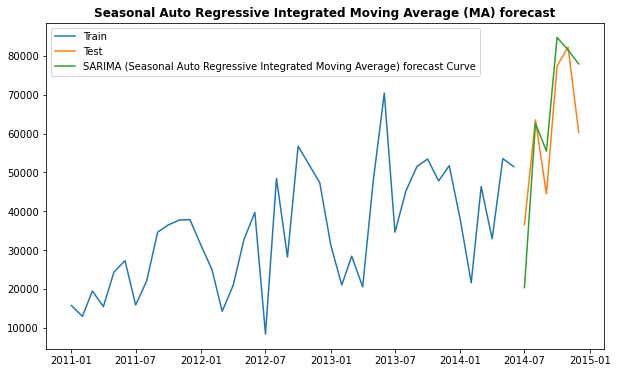

In [93]:
# Plot the train, test and forecast

plt.figure(figsize = (10,6))
plt.plot(APAC_Consumer_train['Sales'], label = 'Train')
plt.plot(APAC_Consumer_test['Sales'], label = 'Test')
plt.plot(APAC_Consumer_SARIMA['SARIMA_Sales_Forecast'][APAC_Consumer_test.index.min():],label = 'SARIMA (Seasonal Auto Regressive Integrated Moving Average) forecast Curve')
plt.legend(loc = 'best')
plt.title('Seasonal Auto Regressive Integrated Moving Average (MA) forecast',fontweight = 'bold')
plt.show()

#### <font color=Green>Approach:
    
<font color=Blue> --> **Both trend and seasonality were captured by the SARIMA model.**

In [94]:
# Calculating RMSE and MAPE

rmse = np.sqrt(mean_squared_error(APAC_Consumer_test['Sales'], APAC_Consumer_SARIMA['SARIMA_Sales_Forecast'][APAC_Consumer_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_Consumer_test['Sales']-APAC_Consumer_SARIMA['SARIMA_Sales_Forecast'][APAC_Consumer_test.index.min():])/APAC_Consumer_test['Sales'])*100,2)
temp_output = pd.DataFrame({'Method':['SARIMA (Seasonal Auto Regressive Integrated Moving Average) Method'], 'RMSE': [rmse],'MAPE': [mape]})
output = pd.concat([output, temp_output])
output = output[['Method', 'RMSE', 'MAPE']]
output

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27
0,AR (Auto Regression) Method,15505.03,27.27
0,MA (Moving Average) Method,52903.35,81.64
0,ARMA (Auto Regressive Moving Average) Method,50757.91,77.66


In [95]:
output.sort_values('MAPE')

,Method,RMSE,MAPE
0,Holt Winters's Additive Method,12565.60,17.32
0,Holt Winters's Multiplicative Method,10876.35,18.27
0,SARIMA (Seasonal Auto Regressive Integrated Mo...,11188.69,18.38
0,Holt's Exponential Trend Technique,19473.57,26.12
0,Naive method,18774.05,26.86
0,AR (Auto Regression) Method,15505.03,27.27
0,Simple moving average forecast,22019.48,27.55
0,Simple Exponential Method,22824.62,27.70
0,Simple average method,30846.00,38.18
0,ARMA (Auto Regressive Moving Average) Method,50757.91,77.66


## <font color=Green> Outcome:
    
### <font color=Blue> --> **Among the smoothing methods, <font color=Red> Holt Winters' additive method <font color=Blue> is the most accurate forecasting method.**

### <font color=Blue> --> **Among the ARIMA set of techniques, <font color=Red> SARIMA - Seasonal Autoregressive Integrated moving average <font color=Blue> is the most accurate forecasting method.**

## <font color=Green> Conclusion:

### <font color=Blue> --> **Among all methods of forecasting,<font color=red> Holt Winter's Additive Method, Holt Winter's Multiplicative Method, and SARIMA Method <font color=Blue> perform exceptionally well.**

### <font color=Blue> --> **Analyzing the plot enabled us to realize that sales have a trend and a seasonality. Unlike other models which allow us to choose between the two, <font color=red> Holt Winter's and SARIMA <font color=Blue> allow you to capture both.**

### <font color=Blue> --> **Additionally, a time series of sales data may have some sort of seasonality associated with it since the sales of any item will not remain the same throughout the given period, usually a year. There may also be a positive or negative trend associated with it.**

### <font color=Blue> --> **For this reason,<font color=red> Holt Winter's models and SARIMA models <font color=Blue> are the best sales forecasting models.**